In [237]:
import gymnasium as gym
import numpy as np
import random
import matplotlib.pyplot as plt

n_actions = 2
learning_rate = 0.1
discount_factor = 0.99
EPSILON = 0.1
epsilon_decay_rate = 0.99
min_epsilon = 0.01
epochs = 10000

theta_bins = [-12 * np.pi / 180, -6 * np.pi / 180, -1 * np.pi / 180, 0, 1 * np.pi / 180, 6 * np.pi / 180, 12 * np.pi / 180]
x_bins = [-2.4, -0.8, 0.8, 2.4]
theta_dot_bins = [-np.inf, -50, 50, np.inf]
x_dot_bins = [-np.inf, -0.5, 0.5, np.inf]

# Q (theta, x, theta_dot, x_dot, 动作)
Q = np.random.uniform(low=-1, high=1, size=(len(theta_bins)-1, len(x_bins)-1, len(theta_dot_bins)-1, len(x_dot_bins)-1, n_actions))


In [238]:
def discretize_state(state):
    theta, x, theta_dot, x_dot = state
    theta_idx = np.digitize(theta, theta_bins) - 1
    x_idx = np.digitize(x, x_bins) - 1
    theta_dot_idx = np.digitize(theta_dot, theta_dot_bins) - 1
    x_dot_idx = np.digitize(x_dot, x_dot_bins) - 1
    
    
    theta_idx = np.clip(theta_idx, 0, len(theta_bins) - 2)
    x_idx = np.clip(x_idx, 0, len(x_bins) - 2)
    theta_dot_idx = np.clip(theta_dot_idx, 0, len(theta_dot_bins) - 2)
    x_dot_idx = np.clip(x_dot_idx, 0, len(x_dot_bins) - 2)
    
    return theta_idx, x_idx, theta_dot_idx, x_dot_idx

def isTerminal(state, time):
    theta, x, theta_dot, x_dot = state
    if abs(theta) > (12*np.pi/180) or abs(x) > 2.4 or time > 200:
        return True
    else:
        return False
    
def extra_reward(state):
    theta, x, theta_dot, x_dot = state
    if abs(theta) < (6*np.pi/180) or abs(x) < 0.8:
        return 10
    else:
        return 0

def train():
    rewards = []
    for episode in range(epochs):
        state,_ = env.reset()
        state = discretize_state(state)
        done = False
        total_reward = 0
        time = 0
        epsilon = EPSILON

        while not done:
            # epsilon-greedy
            epsilon = max(epsilon_decay_rate*epsilon, min_epsilon)
            if random.uniform(0, 1) < epsilon:
                action = env.action_space.sample()  
            else:
                action = np.argmax(Q[state])
            
            next_state_raw, reward, _, _, _ = env.step(action)
            done = isTerminal(next_state_raw,time)

            next_state = discretize_state(next_state_raw)
            

            
            # update Q
            if not done:
                Q[state][action] = Q[state][action] + learning_rate * (
                    reward + discount_factor * np.max(Q[next_state]) - Q[state][action]
                )
            else:
                Q[state][action] = Q[state][action] + learning_rate * (
                    reward - Q[state][action]
                )

            state = next_state
            total_reward += reward
            time += 1

            


        rewards.append(total_reward)

        if (episode + 1) % 100 == 0:
            print(f"Episode {episode+1}/{epochs}, Average reward: {np.average(rewards[episode-99:episode+1])}")

    return rewards


def test():
    state,_ = env.reset()
    if isinstance(state, dict):
        state = state['state']
    state = discretize_state(state)
    done = False
    total_reward = 0

    while not done:
        action = np.argmax(Q[state])  
        next_state, reward, done, _, _ = env.step(action)
        if isinstance(next_state, dict):
            next_state = next_state['state']
        next_state = discretize_state(next_state)
        state = next_state
        total_reward += reward

    print(f"Test Total Reward: {total_reward}")

In [239]:
env = gym.make('CartPole-v0')
rewards = train()
test()
env.close()

Episode 100/10000, Average reward: 39.78
Episode 200/10000, Average reward: 37.58
Episode 300/10000, Average reward: 29.62
Episode 400/10000, Average reward: 24.57
Episode 500/10000, Average reward: 22.36
Episode 600/10000, Average reward: 30.61
Episode 700/10000, Average reward: 28.83
Episode 800/10000, Average reward: 29.14
Episode 900/10000, Average reward: 26.05
Episode 1000/10000, Average reward: 28.46
Episode 1100/10000, Average reward: 29.24
Episode 1200/10000, Average reward: 30.12
Episode 1300/10000, Average reward: 30.9
Episode 1400/10000, Average reward: 25.84
Episode 1500/10000, Average reward: 36.32
Episode 1600/10000, Average reward: 34.12
Episode 1700/10000, Average reward: 29.44
Episode 1800/10000, Average reward: 24.68
Episode 1900/10000, Average reward: 30.01
Episode 2000/10000, Average reward: 37.87
Episode 2100/10000, Average reward: 36.78
Episode 2200/10000, Average reward: 31.01
Episode 2300/10000, Average reward: 30.56
Episode 2400/10000, Average reward: 36.48
Ep

In [232]:
print(Q)

[[[[[-2.30435493e-02 -6.68946903e-01]
    [-9.42638397e-01 -5.38716924e-01]
    [ 2.85828955e-01  9.92978021e-01]]

   [[ 1.07668090e+01  1.57563022e+01]
    [ 1.29322824e+01  1.98464673e+01]
    [ 8.23568770e+00  1.19805176e+01]]

   [[-7.94350683e-01  3.06314031e-01]
    [-8.35874674e-01  2.50107066e-01]
    [-2.59625418e-01  4.52688021e-01]]]


  [[[ 3.56863436e-01 -9.23652268e-01]
    [ 8.51707144e-01  7.72253517e-01]
    [ 9.02600442e-01 -8.41427053e-01]]

   [[ 3.36272403e+01  3.39651039e+01]
    [ 3.14340397e+01  3.93544057e+01]
    [ 2.02564104e+01  2.57513467e+01]]

   [[ 7.86729163e-01 -3.90368587e-01]
    [ 9.37712745e-01 -7.81578074e-01]
    [ 2.06472592e-01 -7.12093398e-01]]]


  [[[ 4.06286839e-01  5.39299528e-01]
    [ 4.83934465e-02  6.43687364e-01]
    [ 3.95981461e-01  7.55206073e-01]]

   [[ 3.97956393e+01  3.94447290e+01]
    [ 3.50315960e+01  3.58935176e+01]
    [ 3.42832761e+01  4.15120704e+01]]

   [[-3.77224646e-01 -1.97500946e-01]
    [-6.82025276e-01 -7.126324

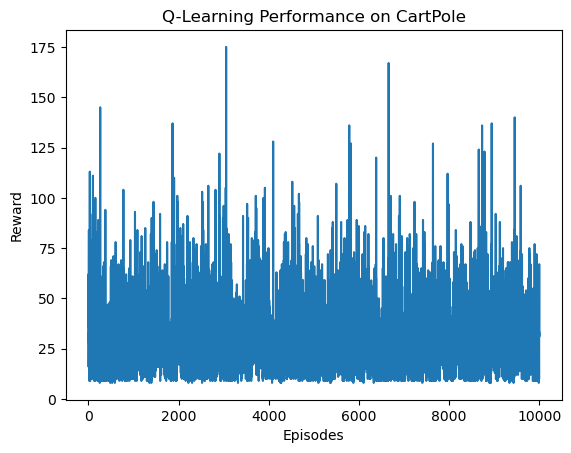

In [240]:
plt.plot(rewards)
plt.xlabel('Episodes')
plt.ylabel('Reward')
plt.title('Q-Learning Performance on CartPole')
plt.show()

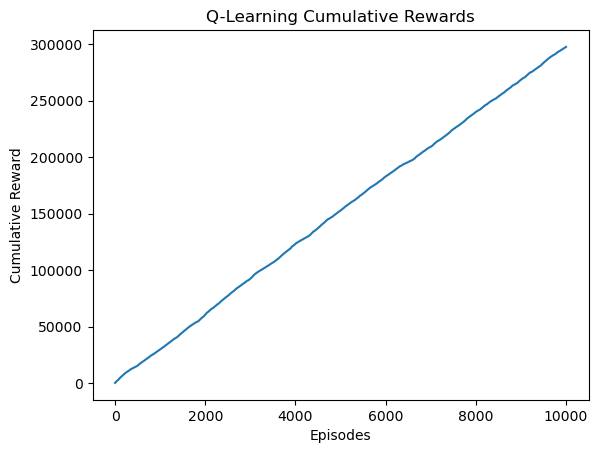

In [241]:
cumulative_rewards = []
for reward in rewards:
    if len(cumulative_rewards) == 0:
        cumulative_rewards.append(reward)
    else:
        cumulative_rewards.append(cumulative_rewards[-1] + reward)
        
plt.plot(cumulative_rewards)
plt.xlabel('Episodes')
plt.ylabel('Cumulative Reward')
plt.title('Q-Learning Cumulative Rewards')
plt.show()